# KNN on  Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# [1]. Reading Data

## [1.1] Loading the data

The dataset is available in two forms
1. .csv file
2. SQLite Database

In order to load the data, We have used the SQLITE dataset as it is easier to query the data and visualise the data efficiently.
<br> 

Here as we only want to get the global sentiment of the recommendations (positive or negative), we will purposefully ignore all Scores equal to 3. If the score is above 3, then the recommendation wil be set to "positive". Otherwise, it will be set to "negative".

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [21]:
con = sqlite3.connect('C:/Users/vinay/knn/final1.sqlite') 
filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews """, con) 
print("Number of data points in our data", filtered_data.shape)

Number of data points in our data (364171, 12)
Number of data points in our data (364171, 12)
Number of data points in our data (364171, 12)
Number of data points in our data (364171, 12)


### sorting the data according to the timestamp

In [20]:
sorted_data=filtered_data.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
sorted_data.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
117924,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
117901,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year ago child s...
298792,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...
169281,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur film star michael...
298791,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni movi keaton hilari wa...


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
117924,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
117901,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year ago child s...
298792,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...
169281,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur film star michael...
298791,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni movi keaton hilari wa...


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
117924,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
117901,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year ago child s...
298792,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...
169281,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur film star michael...
298791,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni movi keaton hilari wa...


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
117924,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
117901,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,b'rememb see show air televis year ago child s...
298792,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth excel a...
169281,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur film star michael...
298791,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni movi keaton hilari wa...


In [19]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(sorted_data.shape)

#How many positive and negative reviews are present in our dataset?
sorted_data['Score'].value_counts()

(50000, 12)


positive    44377
negative     5623
Name: Score, dtype: int64

(50000, 12)


positive    44377
negative     5623
Name: Score, dtype: int64

(50000, 12)


positive    44377
negative     5623
Name: Score, dtype: int64

(50000, 12)


positive    44377
negative     5623
Name: Score, dtype: int64

In [9]:
# i took 100k review
sorted_data=sorted_data[0:50000]
sorted_data['Score'].value_counts()

positive    44377
negative     5623
Name: Score, dtype: int64

positive    44377
negative     5623
Name: Score, dtype: int64

positive    44377
negative     5623
Name: Score, dtype: int64

positive    44377
negative     5623
Name: Score, dtype: int64

In [10]:
#Importing all the necessary packages for performing Knn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.1

In [11]:
X = sorted_data.CleanedText.values
y = sorted_data.Score.values # showing you two ways of indexing a pandas df # We can see that there are 20000 reviews(rows)

X_train, X_test,y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
# split the train data set into cross validation train and cross validation test

# defining the function for all vectorizers

In [40]:

def runKNN(X_train,y_train,X_test,y_test,VectorizationType):
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.naive_bayes import MultinomialNB
    cv_scores = []
    cm_list=[]
    algorithm = ['brute','kd_tree']
    lb= LabelBinarizer()
    y_train=np.array([number[0] for number in lb.fit_transform(y_train)])
    y_test=np.array([number[0] for number in lb.fit_transform(y_test)])
    
    for algo in algorithm:
        #print(algo)
        # kd_tree cannot consume Sparse Matrix. Converting Sparse Matrix to Dense using Truncated SVD.
        if algo == 'kd_tree':
            svd = TruncatedSVD()
            svd.fit(X_train)
            X_train = svd.transform(X_train)
            #X_cv    = svd.transform(X_cv)
            X_test  = svd.transform(X_test)
 
       # creating odd list of K for KNN
        myList = list(range(0,25))
        neighbors = list(filter(lambda x: x % 2 != 0, myList))

        # empty list that will hold cv scores
    
        # perform 10-fold cross validation
        for k in neighbors:
            knn = KNeighborsClassifier(n_neighbors=k,algorithm=algo)
            scores = cross_val_score(knn,X_train , y_train, cv=10, scoring='accuracy')
            cv_scores.append(scores.mean())

        # changing to misclassification error
        MSE = [1 - x for x in cv_scores]

        # determining best k
        optimal_k = neighbors[MSE.index(min(MSE))]
        #print('\nThe optimal number of neighbors is %d.' % optimal_k)
        
        knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

        # fitting the model
        knn_optimal.fit(X_train, y_train)
 
         # predict the response
        pred = []
        for i in range(0,X_test.shape[0],1000): #(CHUNK of data)
            pred.append(knn_optimal.predict_proba(X_test[i:i+1000])[:,1])
            predict = np.hstack(pred)

        # evaluate accuracy
        #predict = knn_optimal.predict(X_test)
        acc = accuracy_score(y_test, predict) * 100
        #print('\n The accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
        
        print('Details for',algo,VectorizationType,'Vectorization:')
        print('*'*100)
        print('\n')
        
        
        
        import sklearn.metrics as metrics
        # calculate the fpr and tpr for all thresholds of the classification
        fpr, tpr, threshold = metrics.roc_curve(y_test, predict)
        roc_auc = metrics.auc(fpr, tpr)

        # method I: plt
       
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()     
        print("The misclassification error for each k value is : ", np.round(MSE,3))
        cm = confusion_matrix(y_test, predict)
        class_label = ["negative", "positive"]
        df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
        sns.heatmap(df_cm, annot = True, fmt = "d")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
        score=knn_optimal.score(X_test, y_test)
        print('The F1 scoring on Test data is:', score)
        print('\n')
        print('Accuracy for K Nearest Neighbours algorithm with alpha value =',optimal_k,', calculated using F1 as scoring metric is ' ,np.round(accuracy_score(y_test, predict)*100))  
        print('missclassification error for each alpha=',np.round(MSE,3))
        print('\n')
        print('f1 score for KNN algorithm with alpha =',optimal_k,' is ' , np.round((f1_score(y_test, predict,average= 'macro')*100),decimals = 2))
        print('\n')
        print('Recall for KNN agorithm with alpha =',k,' is ' , np.round((recall_score(y_test, predict,average= 'macro')*100),decimals = 2))
        print('\n')
        print('Precision for KNN algorithm with aplha =',k,' is ' , np.round((precision_score(y_test, predict,average= 'macro')*100),decimals = 2))
        print('\n')
        print ('\n Classification report for K Nearest Neighbours algorithm with alpha =',optimal_k,' is \n ' , classification_report(y_test,predict))
        print('Accuracy for',algo,' algorithm with K =',optimal_k,' is ' ,np.round(accuracy_score(y_test, predict)*100))
        print('\n')
    return knn_optimal

## knn on BAG OF WORDS

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=10, max_features=500) 
count_vect.fit(X_train)
train_bow    =count_vect.transform(X_train)
#cv_bow       =count_vect.transform(X_cv)
test_bow     =count_vect.transform(X_test)
 # Here we fit transform to the data
print(train_bow.get_shape()) # We can see that the data has 60k rows and max 500 features columns(unique words).
print(test_bow.get_shape())

(35000, 500)
(15000, 500)
(35000, 500)
(15000, 500)
(35000, 500)
(15000, 500)
(35000, 500)
(15000, 500)


Details for brute Bag of Words Vectorization:
****************************************************************************************************


Details for brute Bag of Words Vectorization:
****************************************************************************************************


Details for brute Bag of Words Vectorization:
****************************************************************************************************


Details for brute Bag of Words Vectorization:
****************************************************************************************************




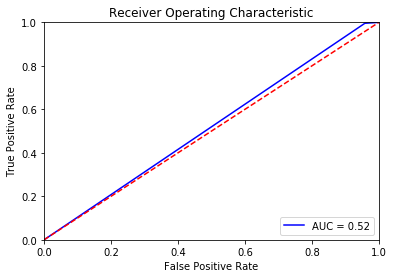

The misclassification error for each k value is :  [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112]


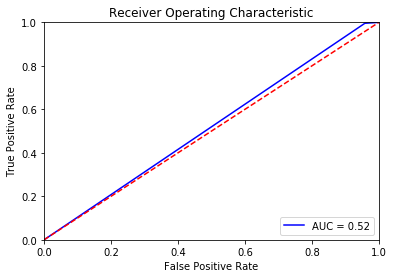

The misclassification error for each k value is :  [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112]


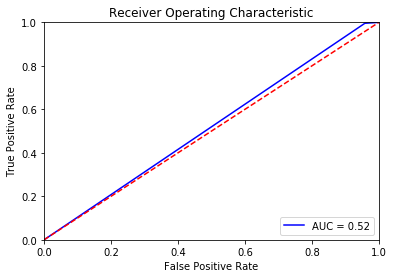

The misclassification error for each k value is :  [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112]


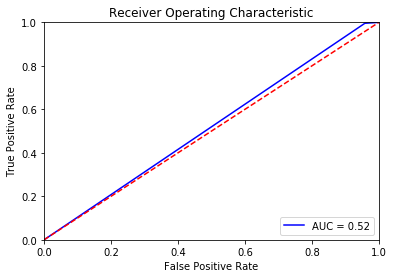

The misclassification error for each k value is :  [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112]


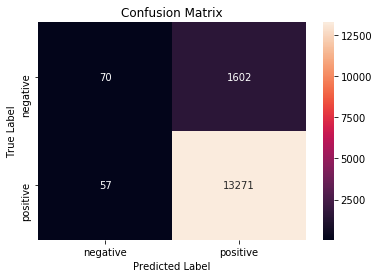

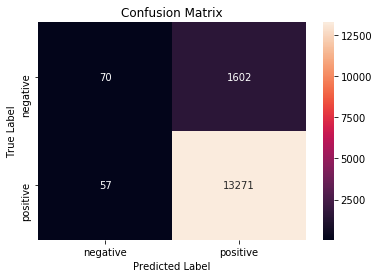

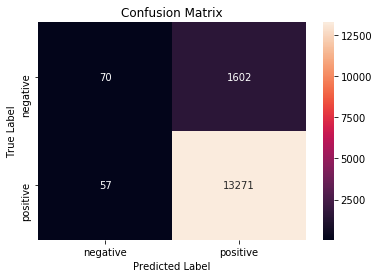

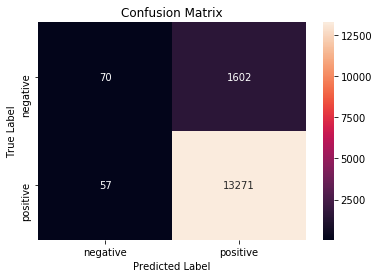

The F1 scoring on Test data is: 0.8894


Accuracy for K Nearest Neighbours algorithm with alpha value = 13 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112]


f1 score for KNN algorithm with alpha = 13  is  50.95


Recall for KNN agorithm with alpha = 23  is  51.88


Precision for KNN algorithm with aplha = 23  is  72.17



 Classification report for K Nearest Neighbours algorithm with alpha = 13  is 
               precision    recall  f1-score   support

          0       0.55      0.04      0.08      1672
          1       0.89      1.00      0.94     13328

avg / total       0.85      0.89      0.84     15000

Accuracy for brute  algorithm with K = 13  is  89.0


The F1 scoring on Test data is: 0.8894


Accuracy for K Nearest Neighbours algorithm with alpha value = 13 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.179 0.133 

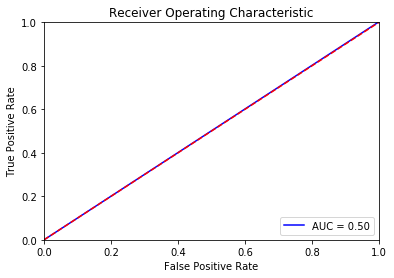

The misclassification error for each k value is :  [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112
 0.2   0.144 0.123 0.117 0.114 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


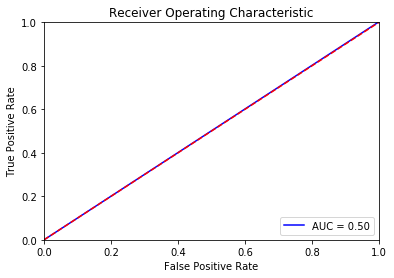

The misclassification error for each k value is :  [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112
 0.2   0.144 0.123 0.117 0.114 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


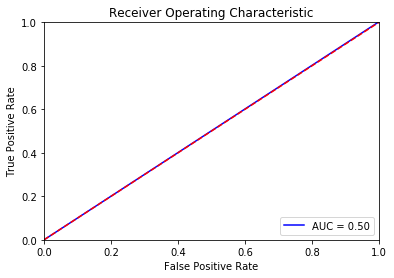

The misclassification error for each k value is :  [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112
 0.2   0.144 0.123 0.117 0.114 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


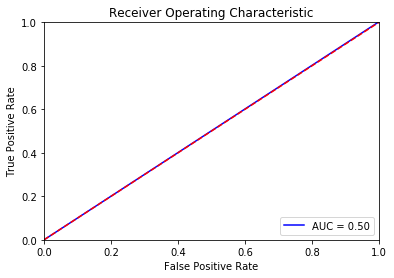

The misclassification error for each k value is :  [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112
 0.2   0.144 0.123 0.117 0.114 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


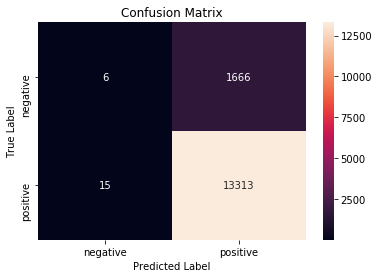

The F1 scoring on Test data is: 0.8879333333333334


Accuracy for K Nearest Neighbours algorithm with alpha value = 13 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112
 0.2   0.144 0.123 0.117 0.114 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


f1 score for KNN algorithm with alpha = 13  is  47.39


Recall for KNN agorithm with alpha = 23  is  50.12


Precision for KNN algorithm with aplha = 23  is  58.72



 Classification report for K Nearest Neighbours algorithm with alpha = 13  is 
               precision    recall  f1-score   support

          0       0.29      0.00      0.01      1672
          1       0.89      1.00      0.94     13328

avg / total       0.82      0.89      0.84     15000

Accuracy for kd_tree  algorithm with K = 13  is  89.0


Wall time: 20min 45s


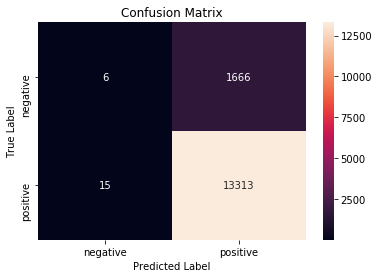

The F1 scoring on Test data is: 0.8879333333333334


Accuracy for K Nearest Neighbours algorithm with alpha value = 13 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112
 0.2   0.144 0.123 0.117 0.114 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


f1 score for KNN algorithm with alpha = 13  is  47.39


Recall for KNN agorithm with alpha = 23  is  50.12


Precision for KNN algorithm with aplha = 23  is  58.72



 Classification report for K Nearest Neighbours algorithm with alpha = 13  is 
               precision    recall  f1-score   support

          0       0.29      0.00      0.01      1672
          1       0.89      1.00      0.94     13328

avg / total       0.82      0.89      0.84     15000

Accuracy for kd_tree  algorithm with K = 13  is  89.0


Wall time: 20min 45s


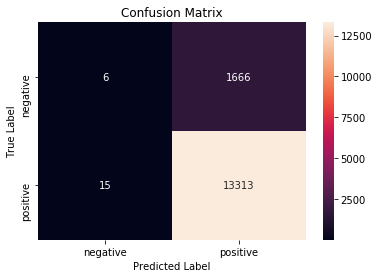

The F1 scoring on Test data is: 0.8879333333333334


Accuracy for K Nearest Neighbours algorithm with alpha value = 13 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112
 0.2   0.144 0.123 0.117 0.114 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


f1 score for KNN algorithm with alpha = 13  is  47.39


Recall for KNN agorithm with alpha = 23  is  50.12


Precision for KNN algorithm with aplha = 23  is  58.72



 Classification report for K Nearest Neighbours algorithm with alpha = 13  is 
               precision    recall  f1-score   support

          0       0.29      0.00      0.01      1672
          1       0.89      1.00      0.94     13328

avg / total       0.82      0.89      0.84     15000

Accuracy for kd_tree  algorithm with K = 13  is  89.0


Wall time: 20min 45s


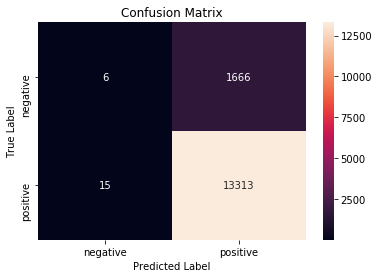

The F1 scoring on Test data is: 0.8879333333333334


Accuracy for K Nearest Neighbours algorithm with alpha value = 13 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.179 0.133 0.119 0.114 0.111 0.111 0.111 0.111 0.111 0.112 0.112 0.112
 0.2   0.144 0.123 0.117 0.114 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


f1 score for KNN algorithm with alpha = 13  is  47.39


Recall for KNN agorithm with alpha = 23  is  50.12


Precision for KNN algorithm with aplha = 23  is  58.72



 Classification report for K Nearest Neighbours algorithm with alpha = 13  is 
               precision    recall  f1-score   support

          0       0.29      0.00      0.01      1672
          1       0.89      1.00      0.94     13328

avg / total       0.82      0.89      0.84     15000

Accuracy for kd_tree  algorithm with K = 13  is  89.0


Wall time: 20min 45s


In [16]:
%%time
bowKNN=runKNN(train_bow,y_train,test_bow,y_test,'Bag of Words')

# [4.2] Bigrams and n-grams

In [22]:
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=500)
count_vect.fit(X_train)
train_bi    =count_vect.transform(X_train)
#cv_bi       =count_vect.transform(X_cv)
test_bi     =count_vect.transform(X_test)

Details for brute Bigrams and n-grams Vectorization:
****************************************************************************************************




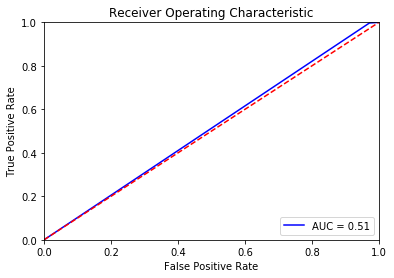

The misclassification error for each k value is :  [0.178 0.132 0.12  0.113 0.112 0.112 0.111 0.112 0.111 0.112 0.111 0.112]


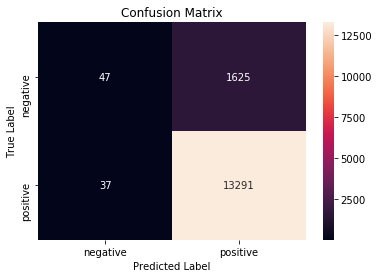

The F1 scoring on Test data is: 0.8892


Accuracy for K Nearest Neighbours algorithm with alpha value = 17 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.178 0.132 0.12  0.113 0.112 0.112 0.111 0.112 0.111 0.112 0.111 0.112]


f1 score for KNN algorithm with alpha = 17  is  49.73


Recall for KNN agorithm with alpha = 23  is  51.27


Precision for KNN algorithm with aplha = 23  is  72.53



 Classification report for K Nearest Neighbours algorithm with alpha = 17  is 
               precision    recall  f1-score   support

          0       0.56      0.03      0.05      1672
          1       0.89      1.00      0.94     13328

avg / total       0.85      0.89      0.84     15000

Accuracy for brute  algorithm with K = 17  is  89.0


Details for kd_tree Bigrams and n-grams Vectorization:
****************************************************************************************************




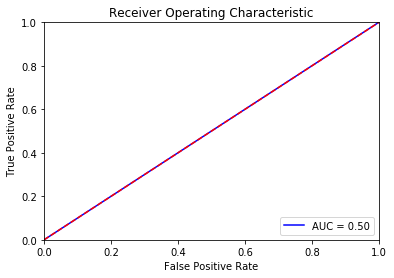

The misclassification error for each k value is :  [0.178 0.132 0.12  0.113 0.112 0.112 0.111 0.112 0.111 0.112 0.111 0.112
 0.199 0.142 0.123 0.117 0.115 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


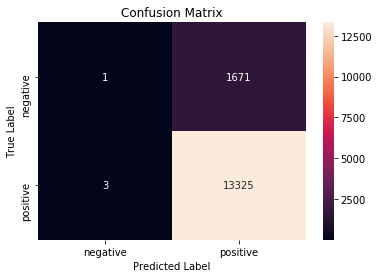

The F1 scoring on Test data is: 0.8884


Accuracy for K Nearest Neighbours algorithm with alpha value = 17 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.178 0.132 0.12  0.113 0.112 0.112 0.111 0.112 0.111 0.112 0.111 0.112
 0.199 0.142 0.123 0.117 0.115 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


f1 score for KNN algorithm with alpha = 17  is  47.1


Recall for KNN agorithm with alpha = 23  is  50.02


Precision for KNN algorithm with aplha = 23  is  56.93



 Classification report for K Nearest Neighbours algorithm with alpha = 17  is 
               precision    recall  f1-score   support

          0       0.25      0.00      0.00      1672
          1       0.89      1.00      0.94     13328

avg / total       0.82      0.89      0.84     15000

Accuracy for kd_tree  algorithm with K = 17  is  89.0


Wall time: 49min 46s


In [27]:
%%time
bigramKNN=runKNN(train_bi,y_train,test_bi,y_test,'Bigrams and n-grams')

# [4.3] TFIDF 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10,max_features=500)
tf_idf_vect.fit(X_train)
train_tfidf    =tf_idf_vect.transform(X_train)
#cv_tfidf       =tf_idf_vect.transform(X_cv)
test_tfidf     =tf_idf_vect.transform(X_test)
train_tfidf.shape


(35000, 500)

(35000, 500)

Details for brute Bag of Words Vectorization:
****************************************************************************************************




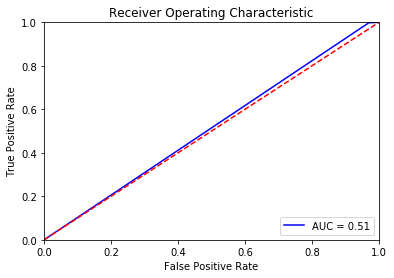

The misclassification error for each k value is :  [0.136 0.117 0.114 0.112 0.111 0.11  0.11  0.11  0.11  0.11  0.11  0.111]


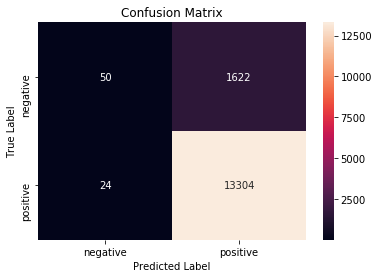

The F1 scoring on Test data is: 0.8902666666666667


Accuracy for K Nearest Neighbours algorithm with alpha value = 13 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.136 0.117 0.114 0.112 0.111 0.11  0.11  0.11  0.11  0.11  0.11  0.111]


f1 score for KNN algorithm with alpha = 13  is  49.95


Recall for KNN agorithm with alpha = 23  is  51.41


Precision for KNN algorithm with aplha = 23  is  78.35



 Classification report for K Nearest Neighbours algorithm with alpha = 13  is 
               precision    recall  f1-score   support

          0       0.68      0.03      0.06      1672
          1       0.89      1.00      0.94     13328

avg / total       0.87      0.89      0.84     15000

Accuracy for brute  algorithm with K = 13  is  89.0


Details for kd_tree Bag of Words Vectorization:
****************************************************************************************************




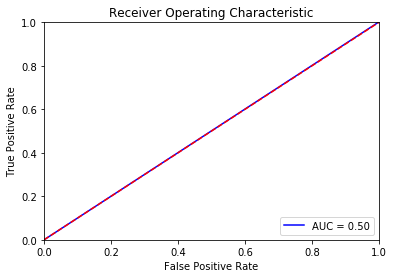

The misclassification error for each k value is :  [0.136 0.117 0.114 0.112 0.111 0.11  0.11  0.11  0.11  0.11  0.11  0.111
 0.196 0.14  0.123 0.118 0.115 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


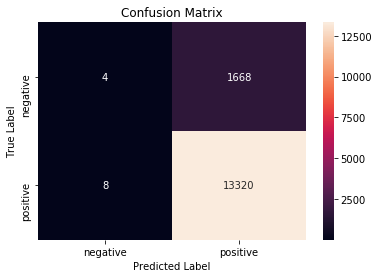

The F1 scoring on Test data is: 0.8882666666666666


Accuracy for K Nearest Neighbours algorithm with alpha value = 13 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.136 0.117 0.114 0.112 0.111 0.11  0.11  0.11  0.11  0.11  0.11  0.111
 0.196 0.14  0.123 0.118 0.115 0.114 0.113 0.113 0.113 0.113 0.113 0.113]


f1 score for KNN algorithm with alpha = 13  is  47.28


Recall for KNN agorithm with alpha = 23  is  50.09


Precision for KNN algorithm with aplha = 23  is  61.1



 Classification report for K Nearest Neighbours algorithm with alpha = 13  is 
               precision    recall  f1-score   support

          0       0.33      0.00      0.00      1672
          1       0.89      1.00      0.94     13328

avg / total       0.83      0.89      0.84     15000

Accuracy for kd_tree  algorithm with K = 13  is  89.0


Wall time: 38min 42s


In [26]:
%%time
bowKNN=runKNN(train_tfidf,y_train,test_tfidf,y_test,'TFIDF')

# [4.4] Word 2 Vec

In [28]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import gensim
# Train your own Word2Vec model using your own text corpus
i=0
list_of_train=[]
for sentance in X_train:
    decode=sentance.decode('utf-8') #Since the data in X_train is of byte type, we convert it into string.
    list_of_train.append(decode.split())
    
'''list_of_cv=[] 
for i in X_cv:
    decode=i.decode('utf-8')
    list_of_cv.append(decode.split())'''
    
list_of_test=[]
for i in X_test:
    decode=i.decode('utf-8')
    list_of_test.append(decode.split())

C:\Users\vinay\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [30]:
#We train our W2V model only using X_train list and try to find 
#avgW2V for train, test and cv datasets.
w2v_model=gensim.models.Word2Vec(list_of_train,min_count=5,size=50, workers=6)

In [31]:
w2v= w2v_model[w2v_model.wv.vocab]

In [32]:
w2v.shape 

(7940, 50)

In [33]:
type(w2v)

numpy.ndarray

# Avg word2vec

In [34]:
def AVGw2v(x):
    sent_vectors = [];           # the avg-w2v for each sentence/review is stored in this list
    for sent in x:    # for each review/sentence
        sent_vec = np.zeros(50)  # as word vectors are of zero length
        cnt_words =0;            # num of words with a valid vector in the sentence/review
        for word in sent:        # for each word in a review/sentence
            try:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
            except:
                pass
        sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    return sent_vectors

In [35]:
avgW2V_train= AVGw2v(list_of_train)

In [41]:
type(avgW2V_train)

list

In [36]:
avgW2V_test= AVGw2v(list_of_test)

In [46]:

def run(X_train,y_train,X_test,y_test,VectorizationType):
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.naive_bayes import MultinomialNB
    cv_scores = []
    cm_list=[]
    algorithm = ['brute','kd_tree']
    lb= LabelBinarizer()
    y_train=np.array([number[0] for number in lb.fit_transform(y_train)])
    y_test=np.array([number[0] for number in lb.fit_transform(y_test)])
    
    for algo in algorithm:
        #print(algo)
        # kd_tree cannot consume Sparse Matrix. Converting Sparse Matrix to Dense using Truncated SVD.
        if algo == 'kd_tree':
            svd = TruncatedSVD()
            svd.fit(X_train)
            X_train = svd.transform(X_train)
            #X_cv    = svd.transform(X_cv)
            X_test  = svd.transform(X_test)
 
       # creating odd list of K for KNN
        myList = list(range(0,25))
        neighbors = list(filter(lambda x: x % 2 != 0, myList))

        # empty list that will hold cv scores
    
        # perform 10-fold cross validation
        for k in neighbors:
            knn = KNeighborsClassifier(n_neighbors=k,algorithm=algo)
            scores = cross_val_score(knn,X_train , y_train, cv=10, scoring='accuracy')
            cv_scores.append(scores.mean())

        # changing to misclassification error
        MSE = [1 - x for x in cv_scores]

        # determining best k
        optimal_k = neighbors[MSE.index(min(MSE))]
        #print('\nThe optimal number of neighbors is %d.' % optimal_k)
        
        knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

        # fitting the model
        knn_optimal.fit(X_train, y_train)
 
         # predict the response
        ''' pred = []
        for i in range(0,X_test.shape,1000): #(CHUNK of data)
            pred.append(knn_optimal.predict_proba(X_test[i:i+1000])[:,1])
            predict = np.hstack(pred)'''

        # evaluate accuracy
        predict = knn_optimal.predict(X_test)
        acc = accuracy_score(y_test, predict) * 100
        #print('\n The accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))
        
        print('Details for',algo,VectorizationType,'Vectorization:')
        print('*'*100)
        print('\n')
        
        
        
        import sklearn.metrics as metrics
        # calculate the fpr and tpr for all thresholds of the classification
        fpr, tpr, threshold = metrics.roc_curve(y_test, predict)
        roc_auc = metrics.auc(fpr, tpr)

        # method I: plt
       
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()     
        print("The misclassification error for each k value is : ", np.round(MSE,3))
        cm = confusion_matrix(y_test, predict)
        class_label = ["negative", "positive"]
        df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
        sns.heatmap(df_cm, annot = True, fmt = "d")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()
        score=knn_optimal.score(X_test, y_test)
        print('The F1 scoring on Test data is:', score)
        print('\n')
        print('Accuracy for K Nearest Neighbours algorithm with alpha value =',optimal_k,', calculated using F1 as scoring metric is ' ,np.round(accuracy_score(y_test, predict)*100))  
        print('missclassification error for each alpha=',np.round(MSE,3))
        print('\n')
        print('f1 score for KNN algorithm with alpha =',optimal_k,' is ' , np.round((f1_score(y_test, predict,average= 'macro')*100),decimals = 2))
        print('\n')
        print('Recall for KNN agorithm with alpha =',k,' is ' , np.round((recall_score(y_test, predict,average= 'macro')*100),decimals = 2))
        print('\n')
        print('Precision for KNN algorithm with aplha =',k,' is ' , np.round((precision_score(y_test, predict,average= 'macro')*100),decimals = 2))
        print('\n')
        print ('\n Classification report for K Nearest Neighbours algorithm with alpha =',optimal_k,' is \n ' , classification_report(y_test,predict))
        print('Accuracy for',algo,' algorithm with K =',optimal_k,' is ' ,np.round(accuracy_score(y_test, predict)*100))
        print('\n')
    return knn_optimal

Details for brute avg W2V Vectorization:
****************************************************************************************************




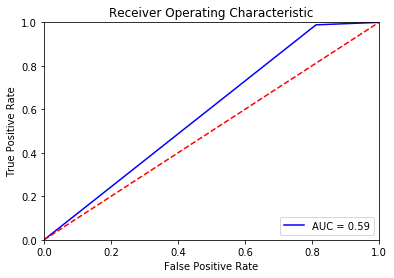

The misclassification error for each k value is :  [0.136 0.111 0.105 0.102 0.101 0.102 0.101 0.101 0.102 0.102 0.102 0.102]


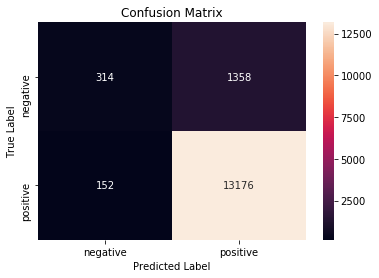

The F1 scoring on Test data is: 0.8993333333333333


Accuracy for K Nearest Neighbours algorithm with alpha value = 9 , calculated using F1 as scoring metric is  90.0
missclassification error for each alpha= [0.136 0.111 0.105 0.102 0.101 0.102 0.101 0.101 0.102 0.102 0.102 0.102]


f1 score for KNN algorithm with alpha = 9  is  61.98


Recall for KNN agorithm with alpha = 23  is  58.82


Precision for KNN algorithm with aplha = 23  is  79.02



 Classification report for K Nearest Neighbours algorithm with alpha = 9  is 
               precision    recall  f1-score   support

          0       0.67      0.19      0.29      1672
          1       0.91      0.99      0.95     13328

avg / total       0.88      0.90      0.87     15000

Accuracy for brute  algorithm with K = 9  is  90.0


Details for kd_tree avg W2V Vectorization:
****************************************************************************************************




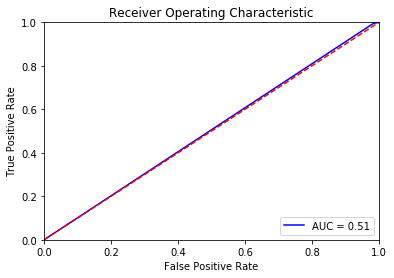

The misclassification error for each k value is :  [0.136 0.111 0.105 0.102 0.101 0.102 0.101 0.101 0.102 0.102 0.102 0.102
 0.194 0.141 0.125 0.118 0.116 0.115 0.114 0.114 0.113 0.113 0.113 0.113]


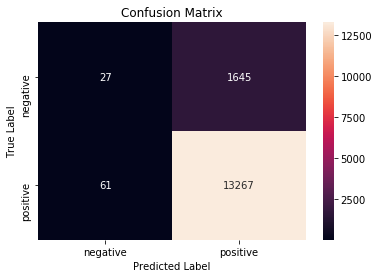

The F1 scoring on Test data is: 0.8862666666666666


Accuracy for K Nearest Neighbours algorithm with alpha value = 9 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.136 0.111 0.105 0.102 0.101 0.102 0.101 0.101 0.102 0.102 0.102 0.102
 0.194 0.141 0.125 0.118 0.116 0.115 0.114 0.114 0.113 0.113 0.113 0.113]


f1 score for KNN algorithm with alpha = 9  is  48.51


Recall for KNN agorithm with alpha = 23  is  50.58


Precision for KNN algorithm with aplha = 23  is  59.83



 Classification report for K Nearest Neighbours algorithm with alpha = 9  is 
               precision    recall  f1-score   support

          0       0.31      0.02      0.03      1672
          1       0.89      1.00      0.94     13328

avg / total       0.82      0.89      0.84     15000

Accuracy for kd_tree  algorithm with K = 9  is  89.0


Wall time: 6min 46s


In [47]:
%%time
bowKNN=run(avgW2V_train,y_train,avgW2V_test,y_test,'avg W2V')

# TFIDF word2vec

In [48]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tfidfw2v_train=tf_idf_vect.fit_transform(X_train)
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))


In [ ]:
'''tf_idf_vect1 = TfidfVectorizer(ngram_range=(1,2))
tfidfw2v_cv=tf_idf_vect1.fit_transform(X_cv)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary1 = dict(zip(tf_idf_vect1.get_feature_names(), list(tf_idf_vect1.idf_)))'''



In [49]:
tf_idf_vect2 = TfidfVectorizer(ngram_range=(1,2))
tfidfw2v_test=tf_idf_vect2.fit_transform(X_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary2 = dict(zip(tf_idf_vect2.get_feature_names(), list(tf_idf_vect2.idf_)))

In [50]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  7940
sample words  ['everyon', 'tast', 'love', 'fruiti', 'natur', 'great', 'product', 'pleas', 'stay', 'away', 'bought', 'first', 'one', 'broke', 'hung', 'night', 'put', 'second', 'last', 'week', 'trap', 'fli', 'materi', 'look', 'feel', 'cheap', 'ever', 'buy', 'thing', 'cant', 'return', 'ship', 'actual', 'unit', 'waist', 'time', 'money', 'pill', 'cat', 'sometim', 'problem', 'particular', 'chicken', 'flavor', 'granola', 'delici', 'gluten', 'free', 'bonus', 'sinc']


In [51]:
# TF-IDF weighted Word2Vec
from tqdm import tqdm

def tfidf_w2v(x,y):
    
    tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
    # final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf
    
    tfidf_sent_vectors = [] # the tfidf-w2v for each sentence/review is stored in this list
    row=0;
    for sent in tqdm(x): # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        weight_sum =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]# 50dim array is created for each word in the list of train(x).
                # obtain the tf_idfidf of a word in a sentence/review
                #tfi_df = final_tf_idf[row, tfidf_feat.index(word)]
                tf_idf = y[word]*(sent.count(word)/len(sent)) #here we get the tfidf value of the word from the list of train
                sent_vec += (vec * tf_idf)
                weight_sum += tf_idf
        if weight_sum != 0:
            sent_vec /= weight_sum
        tfidf_sent_vectors.append(sent_vec)
        row += 1
    return tfidf_sent_vectors

In [52]:
tfidfw2v_train=tfidf_w2v(list_of_train,dictionary)

100%|██████████████████████████████████████████████████████████████████████████| 35000/35000 [00:33<00:00, 1055.37it/s]


In [53]:
tfidfw2v_test=tfidf_w2v(list_of_test,dictionary2)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:14<00:00, 1036.82it/s]


Details for brute tfidf avg W2V Vectorization:
****************************************************************************************************




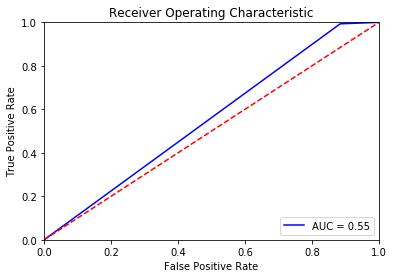

The misclassification error for each k value is :  [0.149 0.119 0.111 0.107 0.107 0.106 0.105 0.105 0.106 0.106 0.105 0.106]


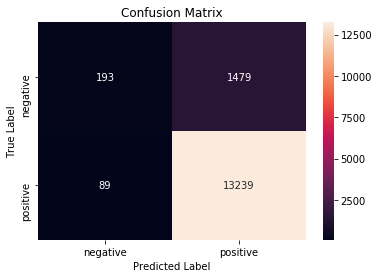

The F1 scoring on Test data is: 0.8954666666666666


Accuracy for K Nearest Neighbours algorithm with alpha value = 21 , calculated using F1 as scoring metric is  90.0
missclassification error for each alpha= [0.149 0.119 0.111 0.107 0.107 0.106 0.105 0.105 0.106 0.106 0.105 0.106]


f1 score for KNN algorithm with alpha = 21  is  57.08


Recall for KNN agorithm with alpha = 23  is  55.44


Precision for KNN algorithm with aplha = 23  is  79.2



 Classification report for K Nearest Neighbours algorithm with alpha = 21  is 
               precision    recall  f1-score   support

          0       0.68      0.12      0.20      1672
          1       0.90      0.99      0.94     13328

avg / total       0.88      0.90      0.86     15000

Accuracy for brute  algorithm with K = 21  is  90.0


Details for kd_tree tfidf avg W2V Vectorization:
****************************************************************************************************




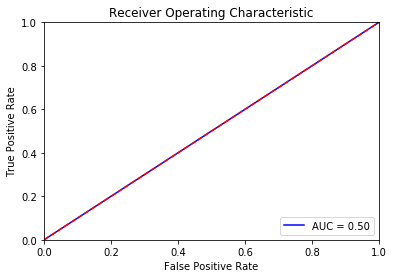

The misclassification error for each k value is :  [0.149 0.119 0.111 0.107 0.107 0.106 0.105 0.105 0.106 0.106 0.105 0.106
 0.196 0.142 0.125 0.118 0.115 0.114 0.114 0.113 0.113 0.113 0.113 0.113]


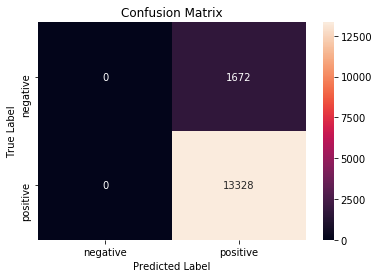

The F1 scoring on Test data is: 0.8885333333333333


Accuracy for K Nearest Neighbours algorithm with alpha value = 21 , calculated using F1 as scoring metric is  89.0
missclassification error for each alpha= [0.149 0.119 0.111 0.107 0.107 0.106 0.105 0.105 0.106 0.106 0.105 0.106
 0.196 0.142 0.125 0.118 0.115 0.114 0.114 0.113 0.113 0.113 0.113 0.113]




C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


f1 score for KNN algorithm with alpha = 21  is  47.05


Recall for KNN agorithm with alpha = 23  is  50.0




C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision for KNN algorithm with aplha = 23  is  44.43




C:\Users\vinay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 Classification report for K Nearest Neighbours algorithm with alpha = 21  is 
               precision    recall  f1-score   support

          0       0.00      0.00      0.00      1672
          1       0.89      1.00      0.94     13328

avg / total       0.79      0.89      0.84     15000

Accuracy for kd_tree  algorithm with K = 21  is  89.0


Wall time: 6min 35s


In [54]:
%%time
bowKNN=run(tfidfw2v_train,y_train,tfidfw2v_test,y_test,'tfidf avg W2V')

In [55]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name", "Hyper Parameter(alpha)", "Accuracy"]

In [56]:
x.add_row(["KNN brute  on BoW",13,89])
x.add_row(["KNN kdtree on BoW",13,89])
x.add_row(["KNN brute  on Bigram",17,89])
x.add_row(["KNN kdtree on Bigram",17,89])
x.add_row(["KNN brute  on tfidf",13,89])
x.add_row(["KNN kdtree on tfidf",13,89])
x.add_row(["KNN brute  on avgW2V",9,90])
x.add_row(["KNN kdtree on avgW2V",9,89])
x.add_row(["KNN brute  on tfidfW2V",21,90])
x.add_row(["KNN kdtree on tfidfW2V",21,90])
print(x)


+------------------------+------------------------+----------+
|       Model Name       | Hyper Parameter(alpha) | Accuracy |
+------------------------+------------------------+----------+
|   KNN brute  on BoW    |           13           |    89    |
|   KNN kdtree on BoW    |           13           |    89    |
|  KNN brute  on Bigram  |           17           |    89    |
|  KNN kdtree on Bigram  |           17           |    89    |
|  KNN brute  on tfidf   |           13           |    89    |
|  KNN kdtree on tfidf   |           13           |    89    |
|  KNN brute  on avgW2V  |           9            |    90    |
|  KNN kdtree on avgW2V  |           9            |    89    |
| KNN brute  on tfidfW2V |           21           |    90    |
| KNN kdtree on tfidfW2V |           21           |    90    |
+------------------------+------------------------+----------+


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1302.59it/s]


## [4.1] BAG OF WORDS

In [ ]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

## [4.2] Bi-Grams and n-Grams.

In [ ]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2), min_df=10, max_features=5000)
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

## [4.3] TF-IDF

In [ ]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

## [4.4] Word2Vec

In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())

In [ ]:
# Using Google News Word2Vectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.


# http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.W17SRFAzZPY
# you can comment this whole cell
# or change these varible according to your need

is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

In [ ]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

## [4.4.1] Converting text into vectors using Avg W2V, TFIDF-W2V

#### [4.4.1.1] Avg W2v

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

#### [4.4.1.2] TFIDF weighted W2v

In [ ]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [ ]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
    
    
    
    

# [5] Assignment 3: KNN

<ol>
    <li><strong>Apply Knn(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>Apply Knn(kd tree version) on these feature sets</strong>
        <br><font color='red'>NOTE: </font>sklearn implementation of kd-tree accepts only dense matrices, you need to convert the sparse matrices of CountVectorizer/TfidfVectorizer into dense matices. You can convert sparse matrices to dense using .toarray() attribute. For more information please visit this <a href='https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.sparse.csr_matrix.toarray.html'>link</a>
        <ul>
            <li><font color='red'>SET 5:</font>Review text, preprocessed one converted into vectors using (BOW) but with restriction on maximum features generated.
            <pre>
            count_vect = CountVectorizer(min_df=10, max_features=500) 
            count_vect.fit(preprocessed_reviews)
            </pre>
            </li>
            <li><font color='red'>SET 6:</font>Review text, preprocessed one converted into vectors using (TFIDF) but with restriction on maximum features generated.
            <pre>
                tf_idf_vect = TfidfVectorizer(min_df=10, max_features=500)
                tf_idf_vect.fit(preprocessed_reviews)
            </pre>
            </li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best K)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

## [5.1] Applying KNN brute force

### [5.1.1] Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [ ]:
# Please write all the code with proper documentation

### [5.1.2] Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [ ]:
# Please write all the code with proper documentation

### [5.1.3] Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [ ]:
# Please write all the code with proper documentation

### [5.1.4] Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [ ]:
# Please write all the code with proper documentation

## [5.2] Applying KNN kd-tree

### [5.2.1] Applying KNN kd-tree on BOW,<font color='red'> SET 5</font>

In [ ]:
# Please write all the code with proper documentation

### [5.2.2] Applying KNN kd-tree on TFIDF,<font color='red'> SET 6</font>

In [ ]:
# Please write all the code with proper documentation

### [5.2.3] Applying KNN kd-tree on AVG W2V,<font color='red'> SET 3</font>

In [ ]:
# Please write all the code with proper documentation

### [5.2.4] Applying KNN kd-tree on TFIDF W2V,<font color='red'> SET 4</font>

In [ ]:
# Please write all the code with proper documentation

# [6] Conclusions

In [ ]:
# Please compare all your models using Prettytable library